**Instituto Tecnológico de Costa Rica**

**Escuela de Ingeniería en Computación**

**Curso: Inteligencia Artificial**

**Segundo Semestre 2023**

**Profesor: Luis-Alexander Calvo-Valverde**

**Trabajo Práctico:** 3

**Datos de la entrega:** Lunes 20 de noviembre 2023, a más tardar a las 11:59 pm

**Estudiantes:**
- Valeria Prado Rodríguez
- Jean Paul Rodríguez Flores


# Experimentación con regresión en redes neuronales artificiales

Indicaciones generales que deben seguir:
1. Se le proporciona el conjunto de datos y un archivo de texto con una breve explicación de las columnas (esta es la versión del dataset que debe usar, no busque similares en internet).
1. Realizarán regresión y el atributo a predecir es: **price**.
1. Ustedes deben ir tomando las decisiones en el proceso y documentarlas en celdas de texto y además su código debe venir ampliamente comentado. Recuerden que el profesor hace de cliente por si tienen dudas.
1. Deben dividir el dataset en tres conjuntos de datos: train (60%), validation (20%) y test (20%).
1. Ustedes proponen el diseño experimental (quiero ver qué han entendido de este concepto fundamental en data science).
1. Deben utilizar **una de estas dos herramientas** para dar seguimiento a los resultados en el caso de la red neuronal artificial:
    1. https://www.wandb.com/
    1. https://www.comet.ml/site/


Criterios de evaluación:
1. Deben presentar una implementación completa, en una de estas opciones: pytorch, tensorflow o keras (Claro que pueden usar numpy, pandas y otras bibliotecas más, para todo el tema de carga del dataset, analizarlo y pre-procesarlo). (**55 puntos**)
1. Uso de herramienta de seguimiento de resultados. (**10 puntos**)
1. Documentación de decisiones en celdas de texto y comentarios al código. (**20 puntos**)
1. Conclusiones finales: En una celda de texto al final del cuaderno, incluya sus conclusiones más importantes del experimento y algunos de los gráficos que genera la herramienta seleccionada, junto con su interpretación de los mismos. (**15 puntos**)

## 0. Imports

In [63]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets
from sklearn.model_selection import train_test_split
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

## 1. Definicion del conjunto de datos de entrenamiento

### 1.1. Importando el conjunto de datos

In [64]:
# leer los datos del archivo csv
df = pd.read_csv('diamonds.csv')

### 1.2 Visualizando el conjunto de datos


   carat  depth  table  price     x     y     z  cut
0   0.23   61.5   55.0    326  3.95  3.98  2.43    4
1   0.21   59.8   61.0    326  3.89  3.84  2.31    3
2   0.23   56.9   65.0    327  4.05  4.07  2.31    1
3   0.29   62.4   58.0    334  4.20  4.23  2.63    3
4   0.31   63.3   58.0    335  4.34  4.35  2.75    1
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   carat   53940 non-null  float64
 1   depth   53940 non-null  float64
 2   table   53940 non-null  float64
 3   price   53940 non-null  int64  
 4   x       53940 non-null  float64
 5   y       53940 non-null  float64
 6   z       53940 non-null  float64
 7   cut     53940 non-null  int64  
dtypes: float64(6), int64(2)
memory usage: 3.3 MB
None
              carat         depth         table         price             x  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.0

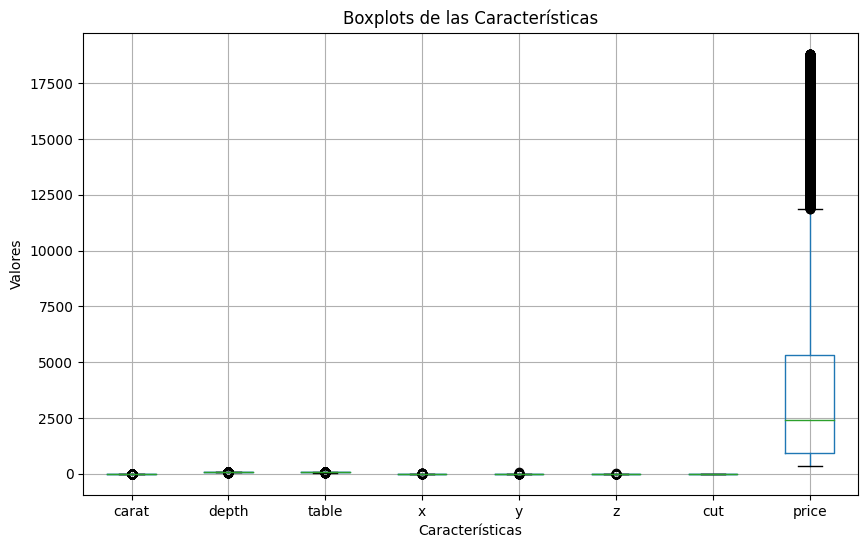

In [65]:
# Mostrar las primeras filas del DataFrame para verificar la carga
print(df.head())

# Mostrar información general sobre el DataFrame
print(df.info())

# Estadísticas descriptivas para atributos numéricos
print(df.describe())

columnas = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'price']

# Visualizar boxplots para identificar valores atípicos
plt.figure(figsize=(10, 6))
df[columnas].boxplot()
plt.title('Boxplots de las Características')
plt.ylabel('Valores')
plt.xlabel('Características')
plt.show()

### 1.3. Preprocesamiento del conjunto de datos

In [66]:
# Tratar valores nulos si los hay
df.dropna(inplace=True)

# Codificar variables categóricas como números (por ejemplo, usando one-hot encoding para 'cut' y 'color')
df = pd.get_dummies(df, columns=['cut'], drop_first=True)

new_columnas = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_1', 'cut_2', 'cut_3', 'cut_4', 'price']

# Tratar lo valores atipicos
df[new_columnas] = df[new_columnas].apply(lambda x: np.log1p(x))


# Normalizar características ('carat', 'x', 'y', 'z', 'depth', 'table')
scaler = MinMaxScaler()
features_to_normalize = ['carat', 'x', 'y', 'z', 'depth', 'table']
df[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

### 1.4 Division del conjunto de datos

In [67]:
# Conjunto X (sin price) y Y (solo price)
X = df.drop('price', axis=1)
y = df['price']

# train de 60%
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
# test y validation de 20%
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# 2. Definicion de la arquitectura de la Red Neuronal Artificial

### 2.1 Definimos una Red Neuronal Artificial formada por 3 capas:
* La primera capa estará formada por 30 neuronas
* La segunda capa estará formada por 10 neuronas
* La última capa estará formada por 1 neurona

In [68]:
# creacion de la red
network = models.Sequential()

# capa de 30 neuronas
network.add(layers.Dense(30, activation='relu', input_shape=X_train.shape[1:]))
# capa de 10 neuronas
network.add(layers.Dense(10, activation='relu'))
# capa de 1 neurona
network.add(layers.Dense(1, activation='linear'))

Visualizar la red junto con el número total de parámetros utilizando el método *summary()*

In [69]:
network.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 30)                330       
                                                                 
 dense_10 (Dense)            (None, 10)                310       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 651 (2.54 KB)
Trainable params: 651 (2.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### 2.2. Acceso a los elementos definidos de la RNA

In [70]:
network.layers

Acceder a los parámetros del modelo que componen las neuronas de la primera hidden layer

In [71]:
hidden1 = network.layers[1]

weights, biases = hidden1.get_weights()

## 3. Configuracion de la Red Neuronal Artificial

In [72]:
network.compile(loss='mean_squared_error',
                optimizer='sgd')

## 4. Preparacion del conjunto de datos

### 4.1. Preparación de las características de entrada

In [73]:
scaler = RobustScaler()

X_train_prep = scaler.fit_transform(X_train)
X_val_prep = scaler.transform(X_val)
X_test_prep = scaler.transform(X_test)

## 5. Entrenamiento de la Red Neuronal Artificial

###Herammienta de Seguimiento

Antes de entrenamiento configuramos el experimento Comet

(herramienta para dar seguimiento a los resultados de la red **neuronal**)

In [74]:
#Configuracion del experimento
!pip install comet_ml
from comet_ml import Experiment
experiment = Experiment(
  api_key="L7gVGzflDtc0Y6x2mBTpM1nNm",
  project_name="general",
  workspace="valhylian"
)

#Asignación de Hiperparámetros
hyper_params = {
    "learning_rate": 0.01,
    "batch_size": 32,
    "hidden_layers": 2,
    "neurons_per_layer": [30, 10],
    "activation_function": "relu",
    "dropout_rate": 0.2,
}
experiment.log_parameters(hyper_params)

COMET WARNING: To get all data logged automatically, import comet_ml before the following modules: tensorflow, tensorboard, sklearn, keras.
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/valhylian/general/fedfb547c3bf4b489bd25dd2fb2f1fe4
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     MAE            : 0.22323092050802015
COMET INFO:     MSE            : 0.07846652006474145
COMET INFO:     R2             : 0.9234157508885474
COMET INFO:     train_loss [5] : (0.06628051400184631, 0.29134705662727356)
COMET INFO:     val_loss [5]   : (0.06843965500593185, 0.08081191033124924)
COMET INFO:   Parameters:
COMET INFO:     activation_function : relu
COMET INFO:     batch_si

### Entrenamiento

In [75]:
history = network.fit(X_train_prep,
                      y_train,
                      epochs=5,
                      validation_data=(X_val_prep, y_val))

Epoch 1/5
1012/1012 [==============================] - 9s 8ms/step - loss: 0.5175 - val_loss: 0.0780
Epoch 2/5
1012/1012 [==============================] - 9s 9ms/step - loss: 0.0743 - val_loss: 0.0732
Epoch 3/5
1012/1012 [==============================] - 10s 9ms/step - loss: 0.0687 - val_loss: 0.0686
Epoch 4/5
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0665 - val_loss: 0.0871
Epoch 5/5
1012/1012 [==============================] - 4s 4ms/step - loss: 0.0654 - val_loss: 0.0644


Visualizacion de la variable **history**


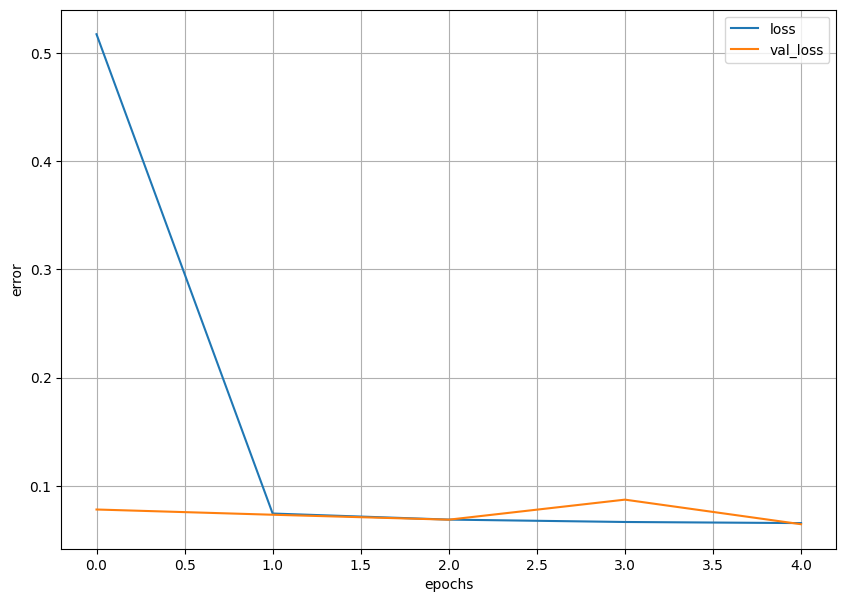

In [76]:
pd.DataFrame(history.history).plot(figsize=(10, 7))
plt.grid(True)
plt.xlabel("epochs")
plt.ylabel("error")
plt.show()

## 6. Validación con el conjunto de datos de pruebas

In [77]:
test_loss = network.evaluate(X_test_prep, y_test)

print('test_mse:', test_loss)

print('test_rmse:', pow(test_loss,1/2))

338/338 [==============================] - 1s 4ms/step - loss: 0.0614
test_mse: 0.061392370611429214
test_rmse: 0.24777483853577467


###Registro de métricas para el seguimiento

In [78]:
# Registro de métricas durante el entrenamiento
for epoch in range(5):  # Suponiendo 5 épocas como en el entrenamiento
    train_loss = history.history['loss'][epoch]
    val_loss = history.history['val_loss'][epoch]

    # Aquí se registran las métricas en Comet
    experiment.log_metric("train_loss", train_loss, step=epoch)
    experiment.log_metric("val_loss", val_loss, step=epoch)

## 7. Predicción de nuevos ejemplos

In [79]:
print(df.iloc[445])

carat    0.244734
depth    0.584399
table    0.331806
price    7.943428
x        0.784802
y        0.473710
z        0.439692
cut_1    0.000000
cut_2    0.693359
cut_3    0.000000
cut_4    0.000000
Name: 445, dtype: float64


In [80]:
# Suponemos que X_new es un nuevo ejemplo que el algoritmo no ha visto nunca
X_new = X_test.iloc[445]

# Representación gráfica del nuevo ejemplo que queremos predecir
df_new = pd.DataFrame([X_new], columns=new_columnas[:-1])
df_new.head()

# Verifica las columnas presentes en df_new
print(df_new.columns)

# Preprocesamos el nuevo ejemplo que queremos predecir
X_new_prep = scaler.transform(df_new)

# Relizamos la prediccion
y_predict = network.predict(X_new_prep)


Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_1', 'cut_2', 'cut_3',
       'cut_4'],
      dtype='object')
1/1 [==============================] - 0s 101ms/step


### Registrar Metricas

In [81]:
# Realizamos la predicción para todo el conjunto de prueba
y_predict = network.predict(X_test_prep)

# Calculamos las métricas utilizando todas las predicciones y valores reales del conjunto de prueba
mae = mean_absolute_error(y_test, y_predict)
mse = mean_squared_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)

# Registramos las métricas en Comet o donde desees
experiment.log_metric("MAE", mae)
experiment.log_metric("MSE", mse)
experiment.log_metric("R2", r2)



338/338 [==============================] - 1s 3ms/step


###Comparación

In [82]:
y_predict

y_predict.round(2)

# Comparamos la predicción con el valor original
print("Predicción:", y_predict.round(2))
print("Valor original:", y_test.iloc[445])

Predicción: [[8.74]
 [6.63]
 [7.71]
 ...
 [6.82]
 [8.37]
 [6.79]]
Valor original: 6.584791392385716


In [83]:
# Registrar el gráfico de computación en Comet
experiment.set_model_graph(network)
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/valhylian/general/4260efee6ed0447cbc11a0af4ffccbed
COMET INFO:   Metrics [count] (min, max):
COMET INFO:     MAE            : 0.19533611760466382
COMET INFO:     MSE            : 0.061392389134694435
COMET INFO:     R2             : 0.9400803040690553
COMET INFO:     train_loss [5] : (0.06544452905654907, 0.5174856185913086)
COMET INFO:     val_loss [5]   : (0.06440277397632599, 0.08712922781705856)
COMET INFO:   Parameters:
COMET INFO:     activation_function : relu
COMET INFO:     batch_size          : 32
COMET INFO:     dropout_rate        : 0.2
COMET INFO:     hidden_layers       : 2
COMET INFO:     learning_rate       : 0.0

## Conclusiones

Datos de las métricas registradas en la herramienta Comet:

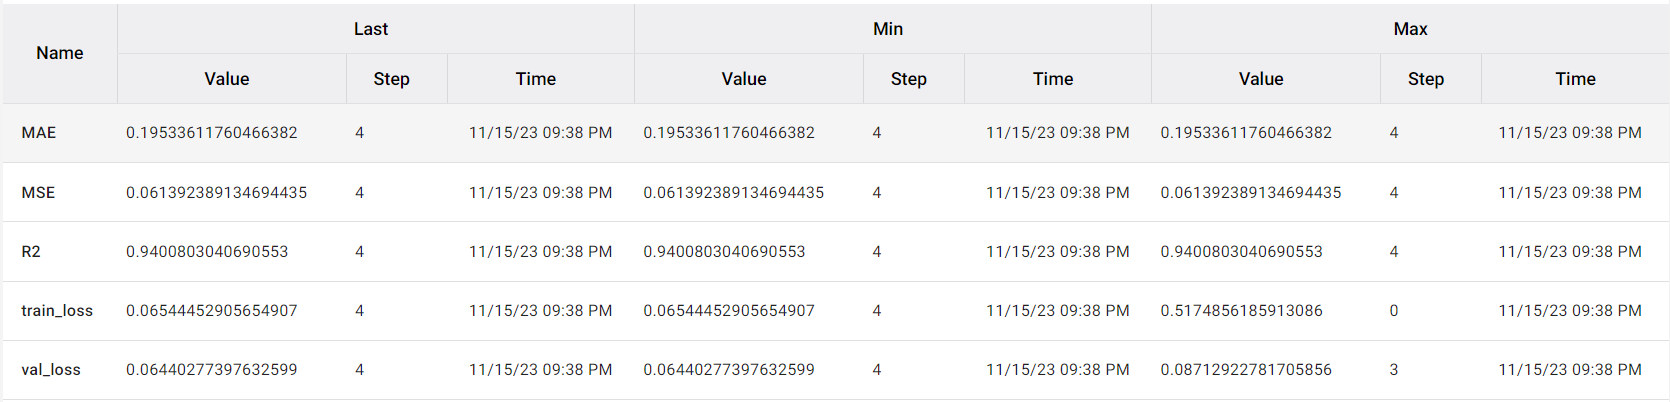

Interpretacion:

MAE (Mean Absolute Error): Se ha obtenido un valor de aproximadamente 0.195. Esto indica que, en promedio, las predicciones del modelo tienen una diferencia absoluta de alrededor de 0.195 unidades con respecto a los valores reales.

MSE (Mean Squared Error): El valor obtenido es aproximadamente 0.061. Esto sugiere que, en promedio, los errores al cuadrado entre las predicciones y los valores reales son alrededor de 0.061 unidades. Al ser un valor bajo, indica que el modelo tiene una precisión bastante alta.

R2 (Coeficiente de Determinación): Se ha obtenido un valor de alrededor de 0.940. Este valor cercano a 1 indica que el modelo explica alrededor del 94% de la variabilidad presente en los datos.

train_loss (Pérdida en el Conjunto de Entrenamiento): Se registra un valor de aproximadamente 0.065. Esto indica la cantidad de error que el modelo ha experimentado durante el entrenamiento en promedio.

val_loss (Pérdida en el Conjunto de Validación): El valor obtenido es alrededor de 0.064. Esta métrica proporciona información sobre la capacidad del modelo para generalizar a datos no vistos, y un valor cercano al de la pérdida de entrenamiento es positivo, ya que indica que el modelo no está sobreajustando.

En resumen, los valores de MAE, MSE y R2 indican un buen rendimiento del modelo, con predicciones precisas y una capacidad considerable para explicar la variabilidad en los datos. Además, la consistencia entre las métricas de entrenamiento y validación sugiere que el modelo no está sobreajustando, lo que es alentador para su generalización a nuevos datos.

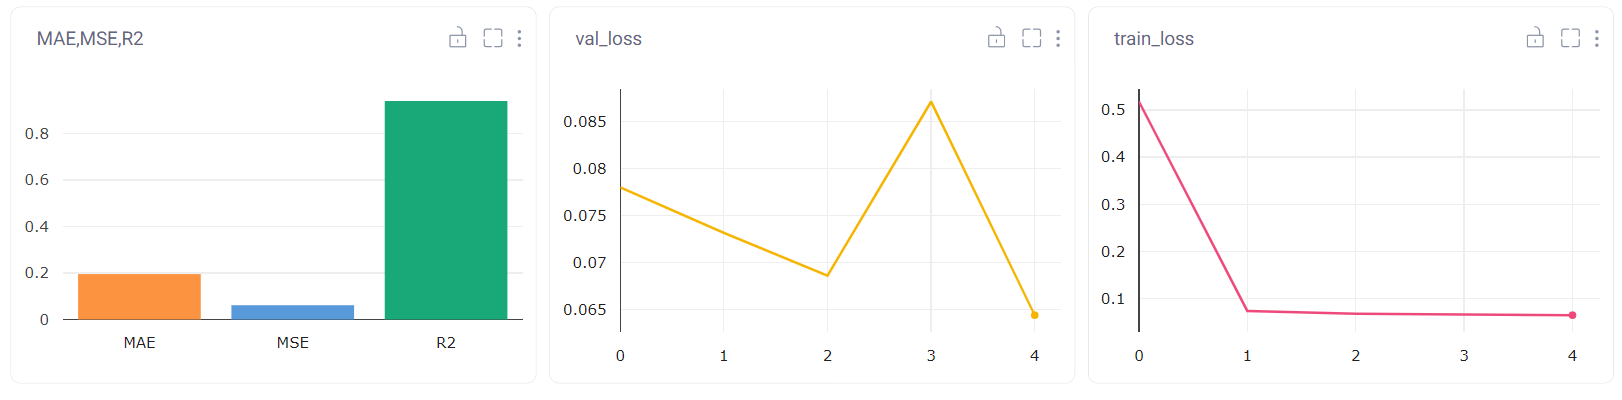

· R2 más alto que las métricas de Error Absoluto Medio (MAE) y Error Cuadrático Medio (MSE) indica que el modelo tiene una buena capacidad para explicar la variabilidad de los datos en comparación con simplemente usar la media como predicción. (R2 es una medida de qué tan bien las predicciones del modelo se ajustan a los datos reales. Un valor cercano a 1 indica un buen ajuste del modelo a los datos)

·val_loss: El comportamiento del gráfico de val_loss es interesante. Comienza con un valor de 0.079 y disminuye a 0.07 en la segunda época, indica una mejora en la pérdida en comparación con la época anterior. Pero en la tercera época, hay un ligero aumento repentino a 0.085, lo que podría indicar que el modelo encontró una configuración momentánea que aumentó la pérdida. Luego, en la cuarta época, la pérdida disminuye significativamente a 0.065, mostrando una recuperación y una mejora con respecto al pico observado previamente.
Este comportamiento sugiere que el modelo pudo haber experimentado un ligero sobreajuste o variabilidad en la tercera época, pero logró corregirse y mejorar su rendimiento en la cuarta época, alcanzando una pérdida más baja.

·train_loss: El rápido descenso desde un valor inicial alto (como 0.5) en la pérdida de entrenamiento hasta un valor bajo (0.1) es un comportamiento típico durante el entrenamiento de redes neuronales. Esto indica que el modelo está mejorando su capacidad para ajustarse a los datos de entrenamiento a medida que avanza el proceso de entrenamiento.

